<a href="https://colab.research.google.com/github/nasim-fani/DataMining-Clustering/blob/main/clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

unzip datasets

In [ ]:
!pip install unrar
!unrar x drive/MyDrive/divar_dataset.rar 



In [ ]:
!unrar x drive/MyDrive/digikala_dataset.rar


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from drive/MyDrive/digikala_dataset.rar


Would you like to replace the existing file product.xlsx
13561766 bytes, modified on 2019-03-14 19:45
with a new one
13561766 bytes, modified on 2019-03-14 19:45

[Y]es, [N]o, [A]ll, n[E]ver, [R]ename, [Q]uit 
User break

User break


import libraries

In [ ]:
import numpy as np
import pandas as pd
import xlrd
import csv
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans

read datasets

In [ ]:
divar_data_org = pd.read_csv('divar_posts_dataset.csv')

divar_data_org.head()

digikala_tarikhche = pd.read_csv('orders.csv')

digikala_tarikhche.head()


,ID_Order,ID_Customer,ID_Item,DateTime_CartFinalize,Amount_Gross_Order,city_name_fa,Quantity_item
0,2714054,469662,21386,2015-10-15 08:50:56.000,597982.0,محمود آباد,1.0
1,11104039,3063877,248497,2018-02-11 00:29:26.000,980000.0,خرمدره,1.0
2,4228130,3184893,50144,2016-06-14 00:30:08.000,229358.0,قرچک,1.0
3,22225624,6888562,70208,2018-09-03 14:37:19.000,16514.0,قم,1.0
4,4068771,2533490,67627,2016-05-21 11:51:02.000,133028.0,تهران,1.0


In [ ]:
divar_data_org.head()

,Unnamed: 0,archive_by_user,brand,cat1,cat2,cat3,city,created_at,desc,id,image_count,mileage,platform,price,title,type,year
0,0,False,NaN,for-the-home,furniture-and-home-decore,sofa-armchair,Tehran,Tuesday 07PM,کلاسیک و شیک و استثنایی\nچرم مالزی\nچوب راش\nف...,54761638662241,5,NaN,mobile,3850000,ست مبلمان و نهارخوری ٩ نفره,NaN,NaN
1,1,False,NaN,for-the-home,furniture-and-home-decore,antiques-and-art,Mashhad,Tuesday 07PM,"سلام,یک عدد گلدون نخل سه طبقه ی سالم دارم با پ...",42727631379133,1,NaN,mobile,30000,گلدون مصنوعی نخل,NaN,NaN
2,2,False,NaN,vehicles,cars,heavy,Mashhad,Tuesday 07PM,سریال 43j$NUMبدون شکستگی سه حلقه لاستیک نو یک ...,63194439667302,4,NaN,mobile,-1,لودر کاتر پیلار 950,NaN,NaN
3,3,False,NaN,for-the-home,furniture-and-home-decore,sofa-armchair,Tehran,Tuesday 07PM,مبل راحتی هفت نفره شامل سه نفره یک عدد دونفره ...,19133025491169,4,NaN,mobile,600000,مبل راحتی هفت نفره بامیز جلو مبلی,NaN,NaN
4,4,False,NaN,personal,baby-and-toys,personal-toys,Karaj,Tuesday 08PM,شارژی کنترلی سویچ حمل تا 35 کیلو صندلی برای دو...,58998998335444,2,NaN,mobile,450000,ماشین شارژی,NaN,NaN


In [ ]:
cities = divar_data_org['city'].unique()
print(cities)

['Tehran' 'Mashhad' 'Karaj' 'Qom' 'Isfahan' 'Shiraz' 'Tabriz' 'Ahvaz'
 'Kermanshah']


In [ ]:
cats = divar_data_org['cat2'].unique()
print(cats)

['furniture-and-home-decore' 'cars' 'baby-and-toys' 'parts-accessories'
 'utensils-and-appliances' 'clothing-and-shoes' 'mobile-tablet'
 'childrens-clothing-and-shoe' 'game-consoles-and-video-games'
 'audio-video' 'building-and-garden' 'jewelry-and-watches'
 'equipments-and-machinery' 'bicycle' 'animals' nan 'batch'
 'musical-instruments' 'health-beauty' 'motorcycles' 'computers'
 'sport-leisure' 'book-student-literature' 'utility' 'travel-packages'
 'hobby-collectibles' 'leisure-hobbies-toys' 'phone']


In [ ]:
divar_data = divar_data_org[divar_data_org['cat2'].notna()]

In [ ]:
divar_data.head()

,Unnamed: 0,archive_by_user,brand,cat1,cat2,cat3,city,created_at,desc,id,image_count,mileage,platform,price,title,type,year
0,0,False,NaN,for-the-home,furniture-and-home-decore,sofa-armchair,Tehran,Tuesday 07PM,کلاسیک و شیک و استثنایی\nچرم مالزی\nچوب راش\nف...,54761638662241,5,NaN,mobile,3850000,ست مبلمان و نهارخوری ٩ نفره,NaN,NaN
1,1,False,NaN,for-the-home,furniture-and-home-decore,antiques-and-art,Mashhad,Tuesday 07PM,"سلام,یک عدد گلدون نخل سه طبقه ی سالم دارم با پ...",42727631379133,1,NaN,mobile,30000,گلدون مصنوعی نخل,NaN,NaN
2,2,False,NaN,vehicles,cars,heavy,Mashhad,Tuesday 07PM,سریال 43j$NUMبدون شکستگی سه حلقه لاستیک نو یک ...,63194439667302,4,NaN,mobile,-1,لودر کاتر پیلار 950,NaN,NaN
3,3,False,NaN,for-the-home,furniture-and-home-decore,sofa-armchair,Tehran,Tuesday 07PM,مبل راحتی هفت نفره شامل سه نفره یک عدد دونفره ...,19133025491169,4,NaN,mobile,600000,مبل راحتی هفت نفره بامیز جلو مبلی,NaN,NaN
4,4,False,NaN,personal,baby-and-toys,personal-toys,Karaj,Tuesday 08PM,شارژی کنترلی سویچ حمل تا 35 کیلو صندلی برای دو...,58998998335444,2,NaN,mobile,450000,ماشین شارژی,NaN,NaN


In [ ]:
vectors = np.zeros([len(cities),len(cats)])
df = divar_data.to_dict("records")

In [ ]:
for row in df:
  cat = row['cat2']
  city = row['city']
  cityIndex =np.where(cities == city)[0][0]
  catIndex = np.where(cats == cat)[0][0]
  vectors[cityIndex][catIndex]+=1
  

In [ ]:
print(vectors)


[[103579.  57455.  12142.  22268.  30122.  39389.  29402.   5311.  16232.
   15260.   8635.   6218.  23018.   3930.  14261.      0.   4793.   3854.
    4783.   9696.  13503.   6850.   1526.   4400.   1071.   2033.    603.
    1193.]
 [ 27146.  16014.   2971.   7555.   8877.  16130.  11686.   3155.   3484.
    3761.   3563.   1323.   6751.   1860.  12247.      0.   1346.      0.
    1083.   2330.   3921.    871.    801.   1259.      0.    398.      0.
       0.]
 [ 20359.  11541.   2157.   5552.   5644.   7359.   6522.    921.   2459.
    2841.   1461.    693.   5342.    918.   3308.      0.    862.      0.
     866.    951.   2556.    680.      0.    744.      0.      0.      0.
       0.]
 [  6347.   1683.    378.   1776.   1652.   4678.   3466.    606.    970.
     604.    524.      0.   1414.    639.   3720.      0.    629.      0.
     378.   1279.    455.      0.    445.    359.      0.      0.      0.
       0.]
 [ 11097.   9940.    521.   4033.   3248.   3644.   6280.      0.   

choose number of clusters

Text(0, 0.5, 'Inertia')

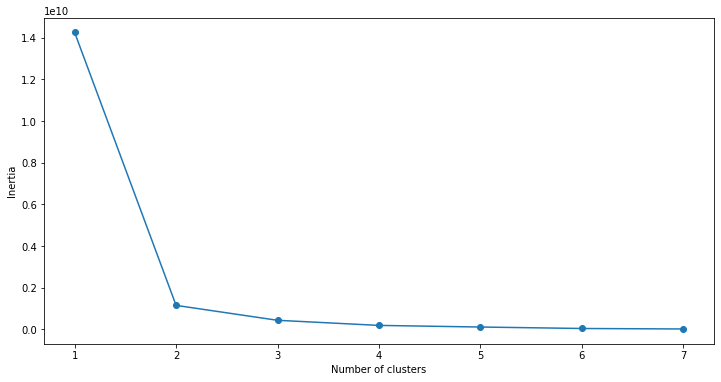

In [ ]:
SSE = []
for cluster in range(1,8):
    kmeans = KMeans(n_jobs = -1, n_clusters = cluster, init='k-means++')
    kmeans.fit(vectors)
    SSE.append(kmeans.inertia_)

frame = pd.DataFrame({'Cluster':range(1,8), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [ ]:
kmeans = KMeans(n_jobs = -1, n_clusters = 4, init='k-means++')
kmeans.fit(vectors)
kmeans.labels_
pred = kmeans.predict(vectors)
kmeans.cluster_centers_


array([[ 14584.66666667,  13851.        ,   1447.        ,
          5162.66666667,   4327.        ,   5242.66666667,
          6614.        ,    454.        ,   2363.33333333,
          2432.33333333,   1250.        ,    670.        ,
          4572.33333333,   1087.33333333,   5410.33333333,
             0.        ,   1098.66666667,      0.        ,
           748.66666667,   1625.66666667,   2218.66666667,
           613.33333333,    143.66666667,    585.66666667,
             0.        ,      0.        ,      0.        ,
             0.        ],
       [103579.        ,  57455.        ,  12142.        ,
         22268.        ,  30122.        ,  39389.        ,
         29402.        ,   5311.        ,  16232.        ,
         15260.        ,   8635.        ,   6218.        ,
         23018.        ,   3930.        ,  14261.        ,
             0.        ,   4793.        ,   3854.        ,
          4783.        ,   9696.        ,  13503.        ,
          6850.        ,   152

final clustering results

In [ ]:
for i in range(len(cities)):
  print(cities[i], "blongs to cluster :", str(pred[i]))

Tehran blongs to cluster : 1
Mashhad blongs to cluster : 3
Karaj blongs to cluster : 0
Qom blongs to cluster : 2
Isfahan blongs to cluster : 0
Shiraz blongs to cluster : 0
Tabriz blongs to cluster : 2
Ahvaz blongs to cluster : 2
Kermanshah blongs to cluster : 2



---
**Question 2**

In [ ]:
digi_cities = ['تهران', 'مشهد', 'کرج', 'قم', 'اصفهان', 'شیراز', 'تبریز', 'اهواز','کرمانشاه']
# digi_cities = pd.DataFrame( [digi_cities])
digi_cities[0]

'تهران'

In [ ]:
# new = np.where( )
print(len(digikala_tarikhche))
digikala_selected = digikala_tarikhche.loc[digikala_tarikhche['city_name_fa'].isin(digi_cities)]
len(digikala_selected)





200000


141900

In [ ]:
digikala_tarikhche.index[2]

2

In [ ]:
# test= digikala_tarikhche.iloc[2000:5000 , :]
# print(len(test))
# test.head()

In [ ]:
digikala_tarikhche.head()

,ID_Order,ID_Customer,ID_Item,DateTime_CartFinalize,Amount_Gross_Order,city_name_fa,Quantity_item
0,2714054,469662,21386,2015-10-15 08:50:56.000,597982.0,محمود آباد,1.0
1,11104039,3063877,248497,2018-02-11 00:29:26.000,980000.0,خرمدره,1.0
2,4228130,3184893,50144,2016-06-14 00:30:08.000,229358.0,قرچک,1.0
3,22225624,6888562,70208,2018-09-03 14:37:19.000,16514.0,قم,1.0
4,4068771,2533490,67627,2016-05-21 11:51:02.000,133028.0,تهران,1.0


check if cities are the same

In [ ]:
digi_cities = digikala_selected['city_name_fa'].unique()
print(digi_cities)

['قم' 'تهران' 'مشهد' 'اصفهان' 'کرج' 'اهواز' 'شیراز' 'کرمانشاه' 'تبریز']


In [ ]:
items = digikala_selected['ID_Item'].unique()
print(items)
len(items)

[  70208   67627  312932 ...  881074   73378 1193629]


74218

In [ ]:
digikala_selected = digikala_selected[digikala_selected['ID_Item'].notna()]
len(digikala_selected)

141900

create vectors

In [ ]:
digi_vectors = np.zeros([len(cities),len(items)])
digi_dict = digikala_selected.to_dict("records")

In [ ]:
print(digi_dict[0])

{'ID_Order': 22225624, 'ID_Customer': 6888562, 'ID_Item': 70208, 'DateTime_CartFinalize': '2018-09-03 14:37:19.000', 'Amount_Gross_Order': 16514.0, 'city_name_fa': 'قم', 'Quantity_item': 1.0}


In [ ]:
for row in digi_dict:
  item = row['ID_Item']
  city = row['city_name_fa']
  cityIndex = np.where(digi_cities == city)[0][0]
  itemIndex = np.where(items == item)[0][0]
  digi_vectors[cityIndex][itemIndex]+=1

In [ ]:
print(digi_vectors)

[[1. 0. 0. ... 0. 0. 0.]
 [1. 3. 1. ... 1. 1. 1.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


Text(0, 0.5, 'Inertia')

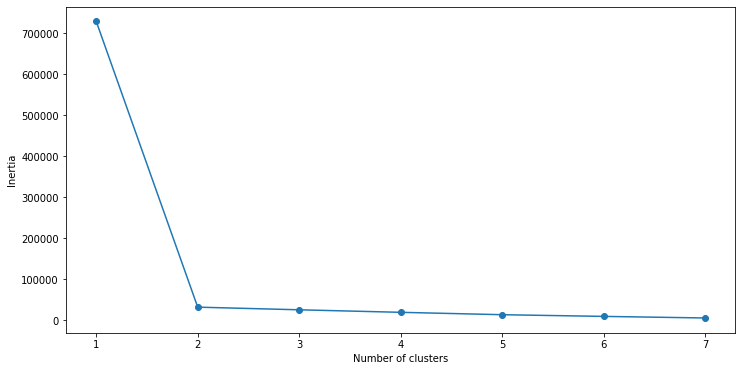

In [ ]:
digi_SSE = []
for cluster in range(1,8):
    kmeans = KMeans(n_jobs = -1, n_clusters = cluster, init='k-means++')
    kmeans.fit(digi_vectors)
    digi_SSE.append(kmeans.inertia_)

digi_frame = pd.DataFrame({'Cluster':range(1,8), 'SSE':digi_SSE})
plt.figure(figsize=(12,6))
plt.plot(digi_frame['Cluster'], digi_frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

k = 4

In [ ]:
kmeans = KMeans(n_jobs = -1, n_clusters = 4, init='k-means++')
kmeans.fit(digi_vectors)
kmeans.labels_
pred = kmeans.predict(digi_vectors)
kmeans.cluster_centers_

array([[ 1.00000000e+00,  3.00000000e+00,  1.00000000e+00, ...,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00],
       [ 1.66666667e-01,  0.00000000e+00, -2.77555756e-17, ...,
        -1.38777878e-17, -1.38777878e-17, -1.38777878e-17],
       [ 1.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

final clustering results

In [ ]:
for i in range(len(digi_cities)):
  print(digi_cities[i], "blongs to cluster :", str(pred[i]))

قم blongs to cluster : 1
تهران blongs to cluster : 0
مشهد blongs to cluster : 3
اصفهان blongs to cluster : 2
کرج blongs to cluster : 1
اهواز blongs to cluster : 1
شیراز blongs to cluster : 1
کرمانشاه blongs to cluster : 1
تبریز blongs to cluster : 1


**Question 4**

In [ ]:
print(len(divar_data_org))
divar = divar_data_org[divar_data_org.price != -1]
print(len(divar))
prices = divar['price'].unique()
print(prices)
divar = divar[divar['price'].notna()]
divar = divar[divar['cat2'].notna()]
print(len(divar))

947635
786203
[ 3850000    30000   600000 ...  1185000 12850009 25000005]
784931


In [ ]:
price_vectors = np.zeros([len(cats),len(prices)])
divar_dict = divar.to_dict("records")

In [ ]:
for row in divar_dict:
  cat = row['cat2']
  price = row['price']
  priceIndex =np.where(prices == price)[0][0]
  catIndex = np.where(cats == cat)[0][0]
  price_vectors[catIndex][priceIndex]+=1

In [ ]:
print(price_vectors)


[[1.100e+01 3.075e+03 3.814e+03 ... 0.000e+00 0.000e+00 0.000e+00]
 [3.000e+00 3.000e+00 7.000e+00 ... 0.000e+00 1.000e+00 1.000e+00]
 [0.000e+00 5.860e+02 1.690e+02 ... 0.000e+00 0.000e+00 0.000e+00]
 ...
 [0.000e+00 2.000e+01 2.500e+01 ... 0.000e+00 0.000e+00 0.000e+00]
 [0.000e+00 1.200e+01 8.000e+00 ... 0.000e+00 0.000e+00 0.000e+00]
 [0.000e+00 3.100e+01 3.000e+00 ... 0.000e+00 0.000e+00 0.000e+00]]


Text(0, 0.5, 'Inertia')

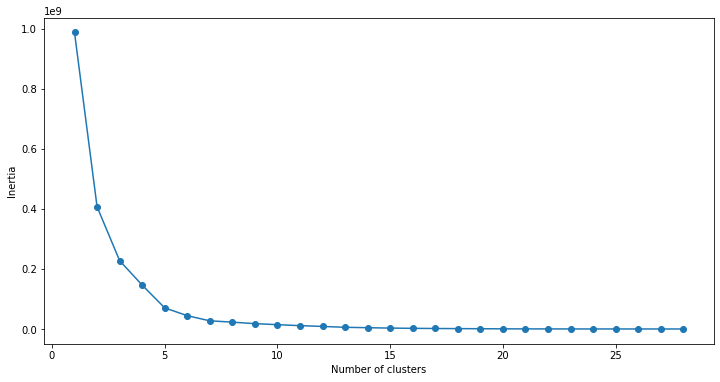

In [ ]:
divar_SSE = []
for cluster in range(1,29):
    kmeans = KMeans(n_jobs = -1, n_clusters = cluster, init='k-means++')
    kmeans.fit(price_vectors)
    divar_SSE.append(kmeans.inertia_)

digi_frame = pd.DataFrame({'Cluster':range(1,29), 'SSE':divar_SSE})
plt.figure(figsize=(12,6))
plt.plot(digi_frame['Cluster'], digi_frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

k = 6

In [ ]:
kmeans = KMeans(n_jobs = -1, n_clusters = 6, init='k-means++')
kmeans.fit(price_vectors)
kmeans.labels_
pred = kmeans.predict(price_vectors)
kmeans.cluster_centers_
print(len(pred))

28


In [ ]:
for i in range(len(cats)):
  print(cats[i], "blongs to cluster :", str(pred[i]))

furniture-and-home-decore blongs to cluster : 1
cars blongs to cluster : 3
baby-and-toys blongs to cluster : 5
parts-accessories blongs to cluster : 2
utensils-and-appliances blongs to cluster : 2
clothing-and-shoes blongs to cluster : 4
mobile-tablet blongs to cluster : 2
childrens-clothing-and-shoe blongs to cluster : 0
game-consoles-and-video-games blongs to cluster : 5
audio-video blongs to cluster : 5
building-and-garden blongs to cluster : 5
jewelry-and-watches blongs to cluster : 0
equipments-and-machinery blongs to cluster : 5
bicycle blongs to cluster : 0
animals blongs to cluster : 2
nan blongs to cluster : 0
batch blongs to cluster : 0
musical-instruments blongs to cluster : 0
health-beauty blongs to cluster : 0
motorcycles blongs to cluster : 0
computers blongs to cluster : 5
sport-leisure blongs to cluster : 0
book-student-literature blongs to cluster : 0
utility blongs to cluster : 0
travel-packages blongs to cluster : 0
hobby-collectibles blongs to cluster : 0
leisure-ho